<h1>Modern Portfolio Theory</h1>

- Modern Portfolio Theory (MPT) is a Nobel Prize-winning economic theory. 
- It explains how risk-averse investors can construct portfolios to optimize or maximize expected return based on a given level of market risk. 
- <a href = "https://en.wikipedia.org/wiki/Harry_Markowitz">Harry Markowitz</a> pioneered this theory in his paper <a href = "https://onlinelibrary.wiley.com/doi/full/10.1111/j.1540-6261.1952.tb01525.x">Portfolio Selection</a> , which was published in the Journal of Finance in 1952. He was later awarded a Nobel Prize for his work on modern portfolio theory.
- Modern Portfolio Theory suggests diversification of all your securities and asset classes and not putting all your eggs in one basket. It emphasises the importance of portfolios, diversification, risk and the connections among different kinds of securities.



In [1]:
# Installing and Importing the libraries

!pip3 install pandas
!pip3 install numpy
!pip3 install matplotlib
!pip3 install seaborn
!pip3 install scipy
!pip3 install nsepy

from datetime import date
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize
from nsepy import * 

### List of all the stocks in our portfolio

In [2]:
Stocks = ["AXISBANK", "SBIN", "ICICIBANK", "BAJFINANCE", "ASIANPAINT", "BHARTIARTL",
          "KOTAKBANK", "HDFC", "HINDUNILVR"]

### Fetching the closing rates of stocks

In [3]:
pf_data = pd.DataFrame()

for a in Stocks:
    data = get_history(symbol=a, start=date(2017,1,1), end=date(2021,7,9))
    pf_data[a] = data['Close']

In [4]:
pf_data

,AXISBANK,SBIN,ICICIBANK,BAJFINANCE,ASIANPAINT,BHARTIARTL,KOTAKBANK,HDFC,HINDUNILVR
Date,,,,,,,,,
2017-01-02,447.75,243.60,251.95,870.05,904.65,311.00,714.80,1217.10,825.35
2017-01-03,455.25,244.90,254.40,884.00,896.60,304.45,711.75,1214.00,829.85
2017-01-04,453.10,242.90,251.10,871.90,906.60,313.90,695.60,1212.10,821.60
2017-01-05,458.05,245.35,257.25,899.75,916.50,321.10,698.95,1217.20,833.15
2017-01-06,455.20,245.90,258.15,878.45,929.50,319.75,716.85,1222.35,833.75
...,...,...,...,...,...,...,...,...,...
2021-07-05,760.35,432.65,647.85,6072.70,3014.80,523.95,1731.10,2494.90,2499.05
2021-07-06,758.35,429.75,650.30,6202.40,3002.50,526.10,1755.35,2496.40,2472.50
2021-07-07,762.90,432.85,654.00,6198.60,3040.10,529.60,1761.80,2529.20,2481.65


Saving the Stock data in csv file (Code commented after use)

In [5]:
# pf_data.to_csv('Data.csv', header=True, index=True)

In [6]:
pd.read_csv('Data.csv')

,Date,AXISBANK,SBIN,ICICIBANK,BAJFINANCE,ASIANPAINT,BHARTIARTL,KOTAKBANK,HDFC,HINDUNILVR
0,2017-01-02,447.75,243.60,251.95,870.05,904.65,311.00,714.80,1217.10,825.35
1,2017-01-03,455.25,244.90,254.40,884.00,896.60,304.45,711.75,1214.00,829.85
2,2017-01-04,453.10,242.90,251.10,871.90,906.60,313.90,695.60,1212.10,821.60
3,2017-01-05,458.05,245.35,257.25,899.75,916.50,321.10,698.95,1217.20,833.15
4,2017-01-06,455.20,245.90,258.15,878.45,929.50,319.75,716.85,1222.35,833.75
...,...,...,...,...,...,...,...,...,...,...
1115,2021-07-05,760.35,432.65,647.85,6072.70,3014.80,523.95,1731.10,2494.90,2499.05
1116,2021-07-06,758.35,429.75,650.30,6202.40,3002.50,526.10,1755.35,2496.40,2472.50
1117,2021-07-07,762.90,432.85,654.00,6198.60,3040.10,529.60,1761.80,2529.20,2481.65
1118,2021-07-08,754.40,424.45,641.90,6117.80,3028.30,525.30,1732.30,2512.05,2447.55


# EDA

In [7]:
pf_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1120 entries, 2017-01-02 to 2021-07-09
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   AXISBANK    1120 non-null   float64
 1   SBIN        1120 non-null   float64
 2   ICICIBANK   1120 non-null   float64
 3   BAJFINANCE  1120 non-null   float64
 4   ASIANPAINT  1120 non-null   float64
 5   BHARTIARTL  1120 non-null   float64
 6   KOTAKBANK   1120 non-null   float64
 7   HDFC        1120 non-null   float64
 8   HINDUNILVR  1120 non-null   float64
dtypes: float64(9)
memory usage: 87.5+ KB


### Plotting daily prices of all the stocks


<Figure size 432x288 with 0 Axes>

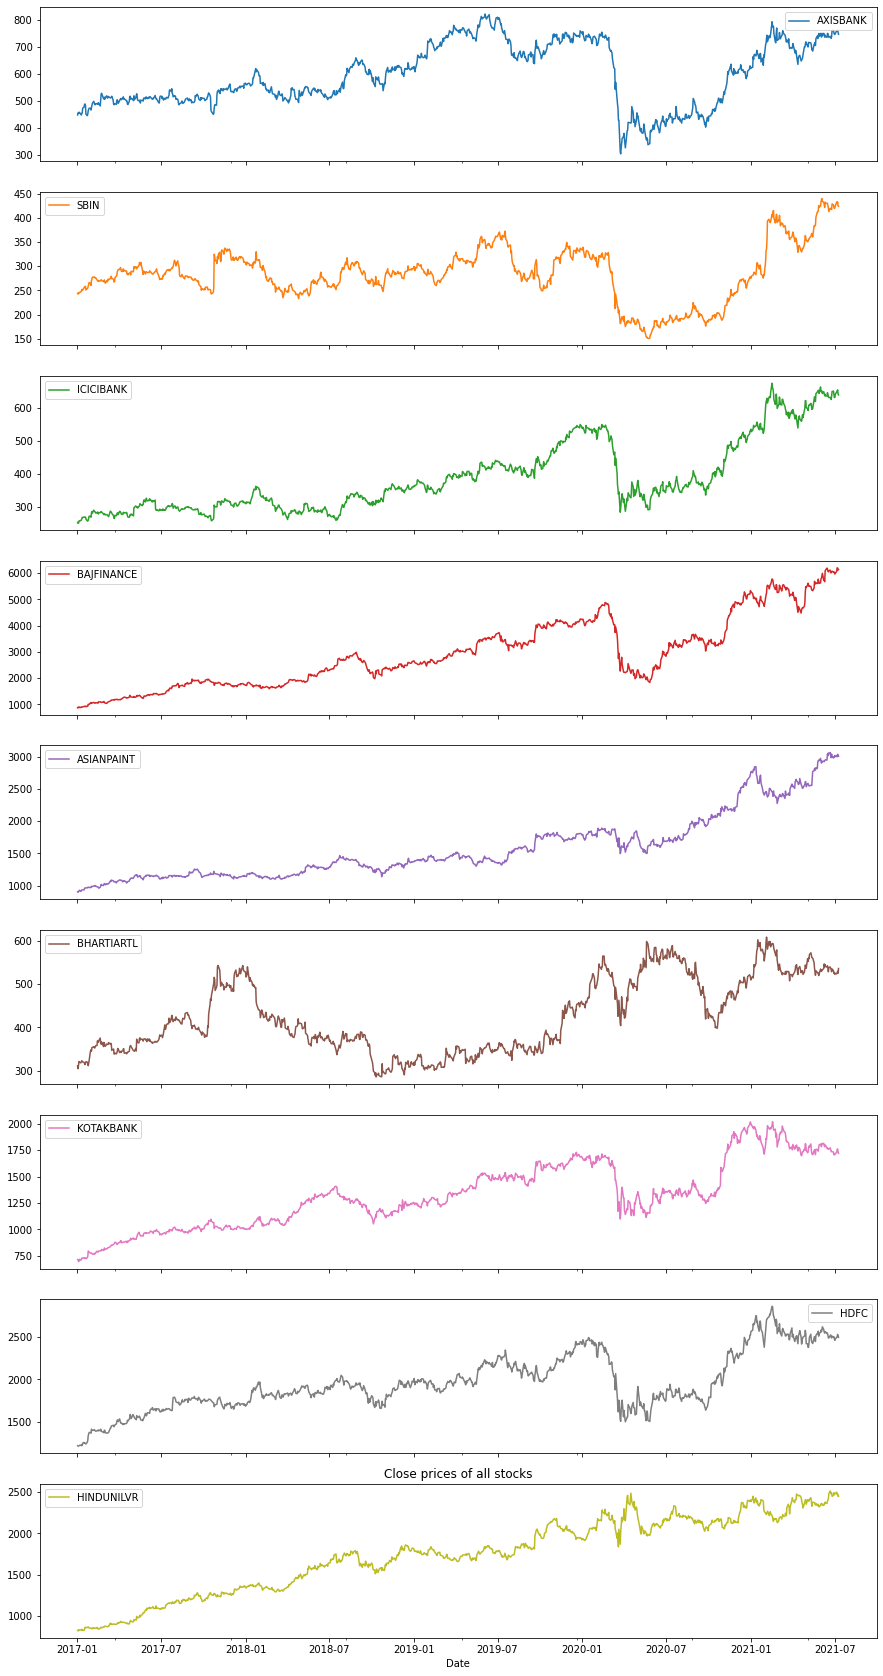

In [8]:
plt.figure()
pf_data.plot(subplots = True,figsize = (15,30))
plt.title("Close prices of all stocks")
plt.show()

### Plotting Normalized Plots

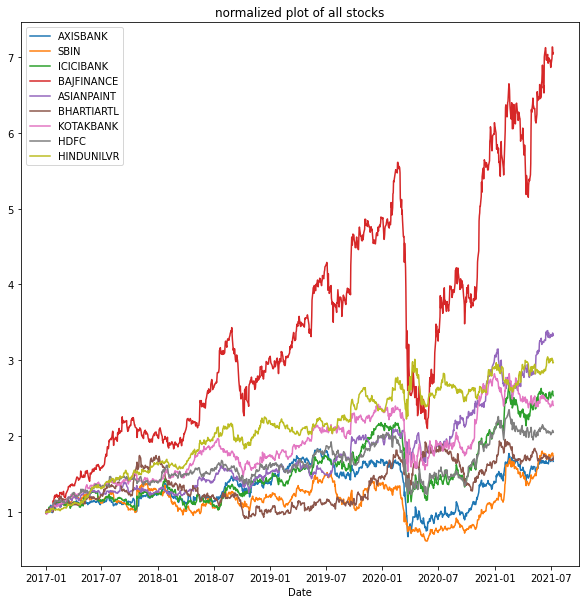

In [9]:
(pf_data/pf_data.iloc[0]).plot(figsize = (10,10))
plt.title("normalized plot of all stocks")
plt.show()

- Bajaj Finance had the maximum growth amoung all the stocks

### Plotting Correlation HeatMap

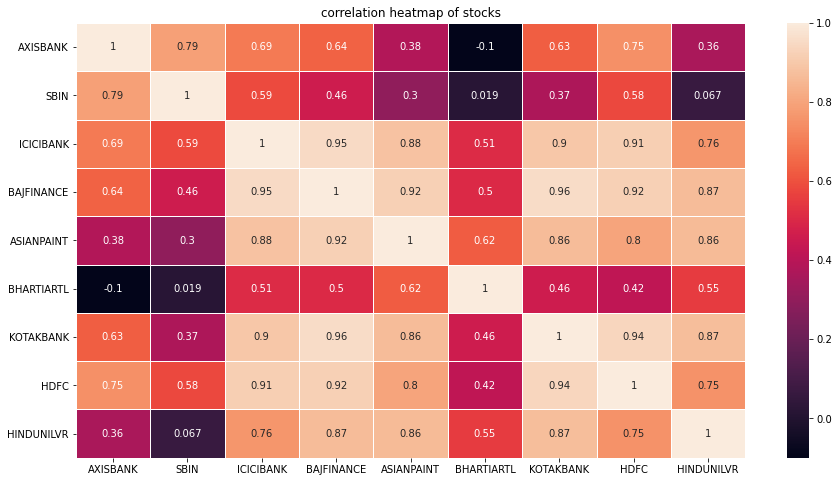

In [10]:
plt.figure(figsize=(15,8))
sns.heatmap(pf_data.corr(),linecolor='white',linewidths=1,annot=True)
plt.title("correlation heatmap of stocks")
plt.show()

### Using heatmap to find strongly positive or strongly negative correlated stocks

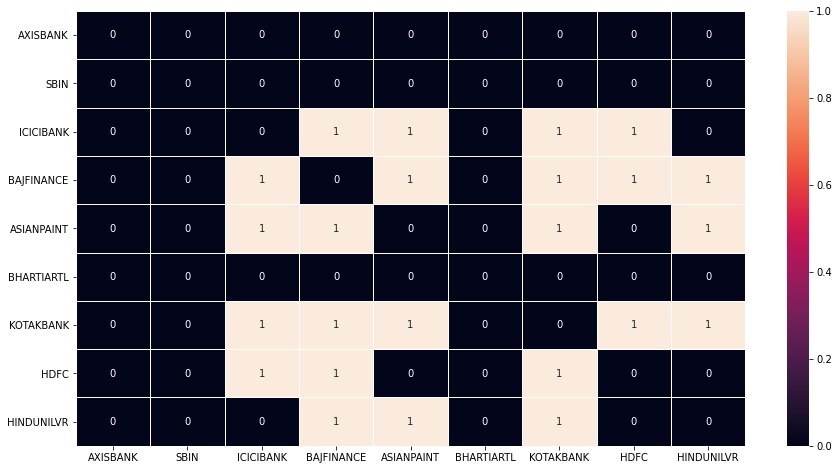

In [11]:
plt.figure(figsize=(15,8))
c = pf_data.corr()
sns.heatmap(((c > 0.8) | (c < -0.8)) & (c != 1),linecolor='white',linewidths=1,annot = True)
plt.show()

- From the heatmaps, we can observe that there is no pair of stocks with high negative correlation. 
- We only have some pairs with  high positive correlation

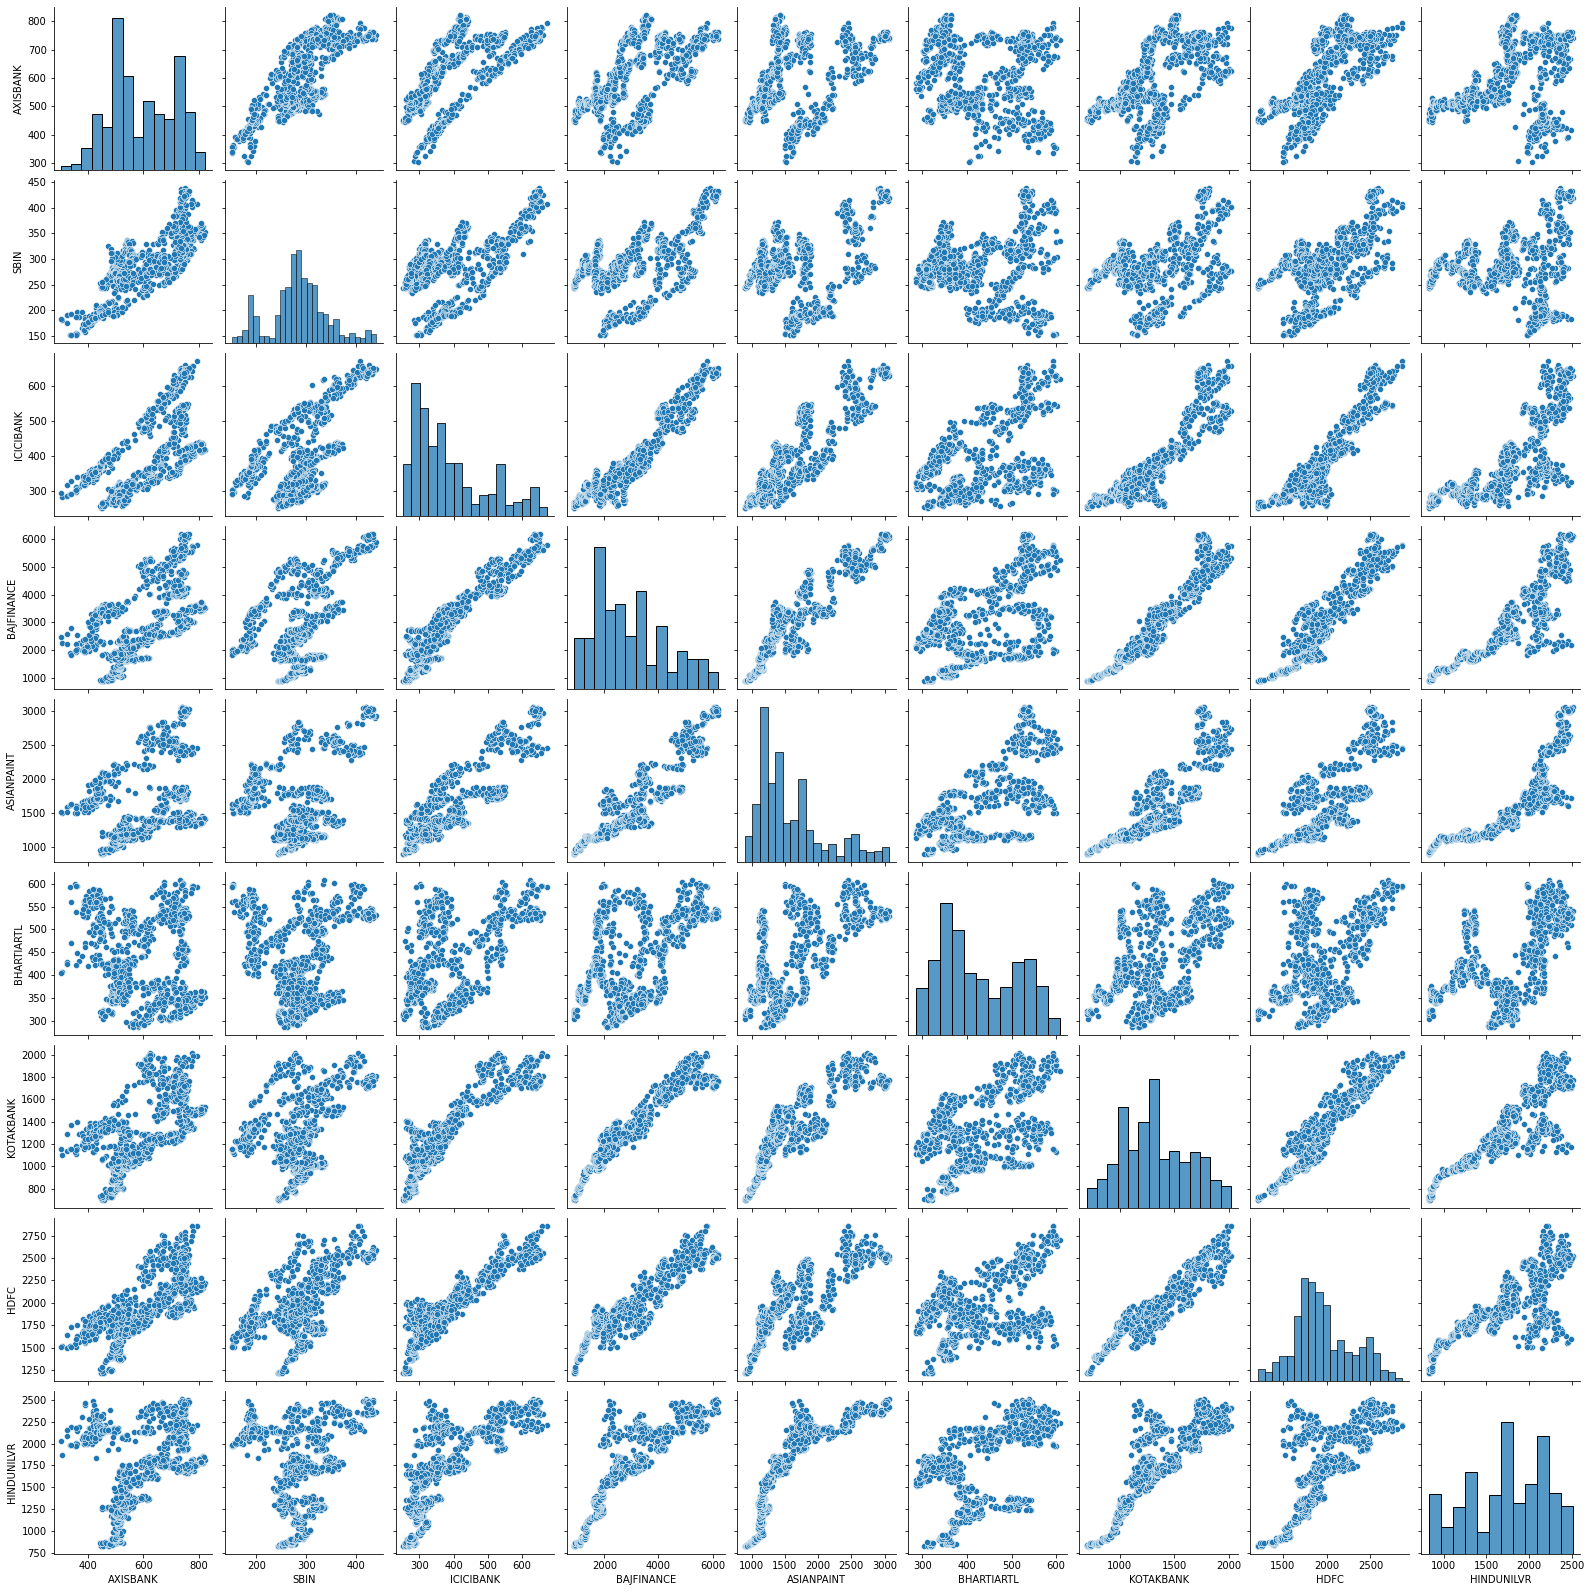

In [12]:
sns.pairplot(pf_data,palette='coolwarm')
plt.show()

- The pair plots also signify the same result that there is no pair of stocks with high negative correlation. We don't find any pair-plot with upper-left to lower-right pattern.
- The pairs with high positive correlation have scatter plot with lower-left to upper-right pattern .
- Other pairs don't form any pattern.

### Finding Daily returns

Formulas used -> Ratio of present Day's return to Yesterday's return

In [13]:
pf_data/pf_data.shift(1)

,AXISBANK,SBIN,ICICIBANK,BAJFINANCE,ASIANPAINT,BHARTIARTL,KOTAKBANK,HDFC,HINDUNILVR
Date,,,,,,,,,
2017-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-03,1.016750,1.005337,1.009724,1.016034,0.991102,0.978939,0.995733,0.997453,1.005452
2017-01-04,0.995277,0.991833,0.987028,0.986312,1.011153,1.031040,0.977309,0.998435,0.990058
2017-01-05,1.010925,1.010086,1.024492,1.031942,1.010920,1.022937,1.004816,1.004208,1.014058
2017-01-06,0.993778,1.002242,1.003499,0.976327,1.014184,0.995796,1.025610,1.004231,1.000720
...,...,...,...,...,...,...,...,...,...
2021-07-05,1.012922,1.019439,1.011870,1.012496,1.003261,0.998000,1.009299,1.007755,1.004724
2021-07-06,0.997370,0.993297,1.003782,1.021358,0.995920,1.004103,1.014008,1.000601,0.989376
2021-07-07,1.006000,1.007213,1.005690,0.999387,1.012523,1.006653,1.003674,1.013139,1.003701


### In finance, we generally use logarithmic returns for analysis

In [14]:
log_returns = np.log(pf_data/pf_data.shift(1))

In [15]:
log_returns

,AXISBANK,SBIN,ICICIBANK,BAJFINANCE,ASIANPAINT,BHARTIARTL,KOTAKBANK,HDFC,HINDUNILVR
Date,,,,,,,,,
2017-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-03,0.016612,0.005322,0.009677,0.015906,-0.008938,-0.021286,-0.004276,-0.002550,0.005437
2017-01-04,-0.004734,-0.008200,-0.013057,-0.013782,0.011092,0.030568,-0.022952,-0.001566,-0.009991
2017-01-05,0.010865,0.010036,0.024197,0.031442,0.010861,0.022678,0.004804,0.004199,0.013960
2017-01-06,-0.006241,0.002239,0.003492,-0.023958,0.014085,-0.004213,0.025287,0.004222,0.000720
...,...,...,...,...,...,...,...,...,...
2021-07-05,0.012839,0.019253,0.011800,0.012419,0.003256,-0.002002,0.009257,0.007725,0.004713
2021-07-06,-0.002634,-0.006725,0.003775,0.021133,-0.004088,0.004095,0.013911,0.000601,-0.010681
2021-07-07,0.005982,0.007188,0.005674,-0.000613,0.012445,0.006631,0.003668,0.013053,0.003694


In [16]:
log_returns.mean()

AXISBANK      0.000458
SBIN          0.000495
ICICIBANK     0.000831
BAJFINANCE    0.001746
ASIANPAINT    0.001074
BHARTIARTL    0.000487
KOTAKBANK     0.000785
HDFC          0.000642
HINDUNILVR    0.000973
dtype: float64

Let's calculate the annual average return

In [61]:
log_returns.mean() * 250 # Stock market is open for almost 50 days in an year

AXISBANK      0.114455
SBIN          0.123685
ICICIBANK     0.207768
BAJFINANCE    0.436417
ASIANPAINT    0.268621
BHARTIARTL    0.121718
KOTAKBANK     0.196181
HDFC          0.160500
HINDUNILVR    0.243214
dtype: float64

- We can see that Bajaj Finance stocks have the highest return while Axis Bank stocks have the lowest return

In [18]:
log_returns.std()

AXISBANK      0.025111
SBIN          0.023816
ICICIBANK     0.023278
BAJFINANCE    0.026426
ASIANPAINT    0.016435
BHARTIARTL    0.022109
KOTAKBANK     0.018664
HDFC          0.019591
HINDUNILVR    0.014784
dtype: float64

In [19]:
log_returns.cov()

,AXISBANK,SBIN,ICICIBANK,BAJFINANCE,ASIANPAINT,BHARTIARTL,KOTAKBANK,HDFC,HINDUNILVR
AXISBANK,0.000631,0.000353,0.000416,0.000347,0.000156,0.000167,0.000211,0.000258,0.000107
SBIN,0.000353,0.000567,0.000381,0.000294,0.000109,0.000167,0.000161,0.000231,0.000080
ICICIBANK,0.000416,0.000381,0.000542,0.000322,0.000131,0.000159,0.000197,0.000264,0.000096
BAJFINANCE,0.000347,0.000294,0.000322,0.000698,0.000157,0.000171,0.000269,0.000292,0.000120
ASIANPAINT,0.000156,0.000109,0.000131,0.000157,0.000270,0.000088,0.000125,0.000120,0.000108
BHARTIARTL,0.000167,0.000167,0.000159,0.000171,0.000088,0.000489,0.000098,0.000130,0.000075
KOTAKBANK,0.000211,0.000161,0.000197,0.000269,0.000125,0.000098,0.000348,0.000208,0.000087
HDFC,0.000258,0.000231,0.000264,0.000292,0.000120,0.000130,0.000208,0.000384,0.000082
HINDUNILVR,0.000107,0.000080,0.000096,0.000120,0.000108,0.000075,0.000087,0.000082,0.000219


In [20]:
log_returns.corr()

,AXISBANK,SBIN,ICICIBANK,BAJFINANCE,ASIANPAINT,BHARTIARTL,KOTAKBANK,HDFC,HINDUNILVR
AXISBANK,1.000000,0.589905,0.711476,0.522181,0.377152,0.300573,0.450415,0.524522,0.288793
SBIN,0.589905,1.000000,0.686409,0.467266,0.277450,0.317873,0.363065,0.494283,0.228581
ICICIBANK,0.711476,0.686409,1.000000,0.523169,0.342845,0.308937,0.452892,0.578783,0.279046
BAJFINANCE,0.522181,0.467266,0.523169,1.000000,0.361552,0.293136,0.546209,0.564977,0.306309
ASIANPAINT,0.377152,0.277450,0.342845,0.361552,1.000000,0.242987,0.408369,0.373506,0.445502
BHARTIARTL,0.300573,0.317873,0.308937,0.293136,0.242987,1.000000,0.237636,0.299690,0.230205
KOTAKBANK,0.450415,0.363065,0.452892,0.546209,0.408369,0.237636,1.000000,0.567715,0.315387
HDFC,0.524522,0.494283,0.578783,0.564977,0.373506,0.299690,0.567715,1.000000,0.283192
HINDUNILVR,0.288793,0.228581,0.279046,0.306309,0.445502,0.230205,0.315387,0.283192,1.000000


# Markowitz Model







- We model our assets by their expected return, $E[R]$ and their risk, which is expressed as their standard deviation, $\sigma$

- Our investment decisions are expressed by investing 100% of our wealth in assets( here, stocks), where each particular investment represents a proportion of our total wealth. 


- We will now implement Markowitz Model. This model assists in the selection of the most efficient portfolios by analyzing various possible portfolios of the selected stocks.

- We invest $w_i$ in $stock_i$ for every i, such that <h1>$\Sigma^{n}_{i=1} w_i = 1$</h1>

- The expected return of the portfolio constructed would be <h1>$$E[R_p] = \Sigma^{n}_{i=1} w_i E[R_i]$$</h1> and the risk associated with the portfolio would be <h1>$$\sigma^2(R_p) = \Sigma^{n}_{i=1} w_i^2 \sigma^2(R_i) + \Sigma^{}_{i=1}\Sigma^{}_{j {\neq} i} w_i w_j \sigma(R_i) \sigma(R_j) \rho_{ij}$$</h1>


- $E[R_i]$ is the annual expected return of $i$th stock, $\sigma(R_i)$ corrsponds to annual standard deviation of $i$th stock and $\rho_{ij}$ is the correlation between the logarithmic returns $i$th and the $j$th stock.



- $E[R_p]$ is the annual expected return of the portfolio and $\sigma(R_p)$ is the risk associated with the portfolio (Also the standard deviation of the portfolio)

- An efficient portfolio is one that maximizes return for a given level of risk. Our task is to select adequate weights $w_i$ to get the efficient portfolio

#### Implementation  

-  Let $W_{1 \times n}$ be a array containing the weights $w_i$ such that $\Sigma^{n}_{i=1} w_i = 1$ and $E[R]_{ n\times 1}$ be another array containing annual expected returns of n stocks present in the portfolio and $C$ be the covariance matrix of annual returns of  stocks, then 

$$E[R_p] = WE[R]$$

$$ \sigma^2(R_p) = W^TCW $$


### Sharpe Ratio

- It is a statistical measure used in Modern Portfolio Theory.
- The Sharpe ratio measures the performance of an investment compared to a risk-free asset, after adjusting for its risk. It is defined as the difference between the returns of the investment and the risk-free return, divided by the standard deviation of the investment.
- A portfolio with a higher Sharpe ratio is considered to have best risk-adjusted returns.

$$ S = \frac{E[R_p] - R_f}{\sigma(R_p)} $$


Here, $R_f$ is the risk free rate of return. I have taken risk free rate as 10 year government bond rate of India on July 9th, i.e 6.19%

In [21]:
# A function for generating a numpy array containing random weights that add upto 1
def RandWeights(size):
    weight = np.random.dirichlet(np.ones(size))
    return weight

In [22]:

risk_free_rate = 0.0619 # 6.19% on July 9

# A function to generate the avg return, risk and the sharpe ratio of the portfolio 
# correponding to the weight array passed
def portfolio_stats(weight):

    # Convert to array in case list was passed instead.
    weight = np.array(weight)
    port_return = np.sum(log_returns.mean() * weight) * 250
    port_risk = np.sqrt(np.dot(weight.T, np.dot(log_returns.cov() * 250, weight)))
    sharpe = (port_return - risk_free_rate)/port_risk

    return {'return': port_return, 'risk': port_risk, 'sharpe': sharpe}

In [23]:
# Trying to generate random weights

length = len(log_returns.columns)
weight = RandWeights(length)
weight

array([0.04783856, 0.19419823, 0.0969152 , 0.02257939, 0.05113648,
       0.04729206, 0.07597913, 0.44936679, 0.01469415])

In [24]:
# Generating Portfolio Statistics
pf_stats = portfolio_stats(weight)

pf_return = pf_stats['return']
pf_risk = pf_stats['risk']


In [25]:
pf_return

0.1695802613703226

In [26]:
pf_risk

0.2595969885286175

In [27]:
sharpe_ratio = pf_stats['sharpe']

In [28]:
sharpe_ratio

0.41479780632529223

#### We will now run a monte carlo simulation to generate random portfolios. We will use the results of simulation to draw an efficient frontier

In [29]:
def Monte_Carlo(iterations):
    portfolio_returns = []
    portfolio_risks = []
    for x in range (iterations):
        weight = RandWeights(length)
        pf_stats = portfolio_stats(weight)
        portfolio_returns.append(pf_stats['return'])
        portfolio_risks.append(pf_stats['risk'])
        
    portfolio_returns = np.array(portfolio_returns)
    portfolio_risks = np.array(portfolio_risks)
    return portfolio_returns, portfolio_risks

    

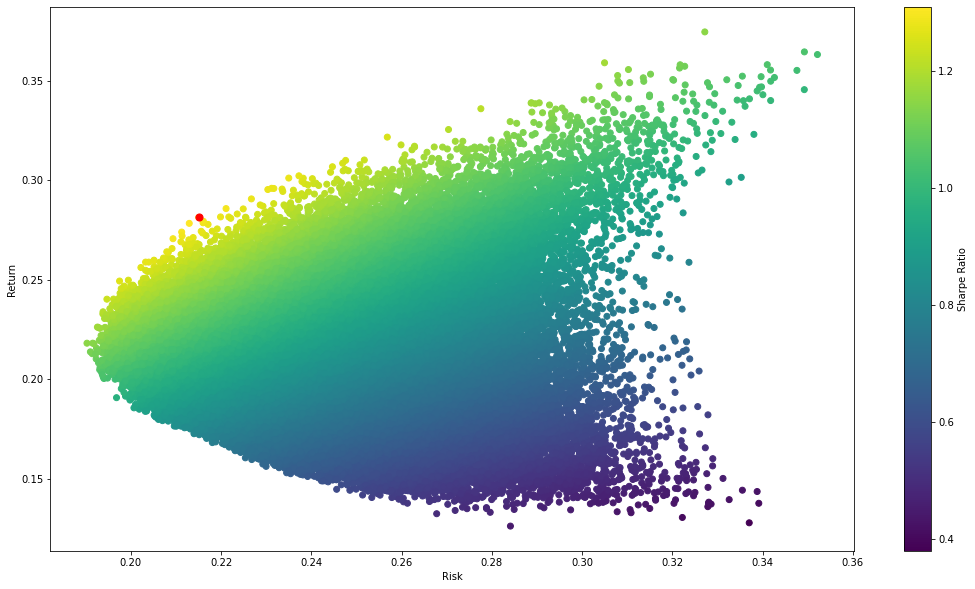

In [30]:
portfolio_returns, portfolio_risks = Monte_Carlo(100000)
sharpe = portfolio_returns / portfolio_risks
max_sr_ret = portfolio_returns[sharpe.argmax()] # return corresponding to maximum sharpe ratio
max_sr_vol = portfolio_risks[sharpe.argmax()] # risk corresponding to maximum sharpe ratio
plt.figure(figsize=(18,10))
plt.scatter(portfolio_risks, portfolio_returns, c=sharpe, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Risk')
plt.ylabel('Return')
plt.scatter(max_sr_vol, max_sr_ret,c='red', s=50) # red dot
plt.show()

- The above plot shows comparison of all portfolio combinations generated in Mone Carlo Simulation in terms of their risk and return. The red dot corresponds to the portfolio having the highest sharpe ratio amoung the generated portfolios. ( This portfolio may not be the one with highest sharpe ratio as we are plotting random portfolios. It is just the portfolio with highest sharpe ratio amoung all the randomly generated portfolios)

- We will now try to generate optimized portffolios subject to various conditions

- This hyperbolic plot is called 'Markowitz's Bullet'

#### Using Optimization to find portfolio with max sharpe ratio
- The below function returns the weights array cooresponding to the portfolio with the highest Sharpe Ratio
- We are using Scipy.optimize.minimize. We are trying to minimize negative Sharpe Ratio (which is same as maximising the sharpe ratio)
- The constraint for optimization is -> Sum of all the weights has to be 1, and all the weights are bounded between 0 and 1

In [60]:

def OptimizationWithSharpeRatio():

    def FindNegSharpe(weight):
        return (-1)*portfolio_stats(weight)['sharpe']

    res = minimize(
          FindNegSharpe,
          RandWeights(length),
          method = 'SLSQP',
          constraints=[
            {'type': 'eq', 'fun': lambda w: np.sum(w) - 1.},
          ],
          bounds=[(0., 1.) for i in range(length)]
        )
    
    return res


In [33]:
OptimizationWithSharpeRatio()

     fun: -1.0910863427634216
     jac: array([ 0.52711447,  0.27400035,  0.01978907, -0.26899615, -0.2694317 ,
        0.03787874, -0.04276197,  0.13286681, -0.26953852])
 message: 'Optimization terminated successfully'
    nfev: 60
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([0.00000000e+00, 1.51463136e-16, 1.16280141e-16, 3.18527436e-01,
       3.11216819e-01, 7.53863495e-17, 3.64275984e-17, 3.81230971e-17,
       3.70255745e-01])

- The optimization is successful. 


- The required weights are in the key x

#### Using Optimisation to find portfolio that has minimum risk for a given expected return

- Sometimes, the investors want to have a portfolio with a fixed targert return. 
- They want to find portfolio that would provide that return with minimum risk involved

In [34]:
def OptimizationForAGivenReturn(target_return):
    
    def fun(weight):
        pf_stats = portfolio_stats(weight)
        _risk = pf_stats['risk']
        return _risk
    
    res = minimize(
      fun,
      RandWeights(length),
      method = 'SLSQP',
      constraints=[{'type':'eq','fun': lambda x: portfolio_stats(x)['return']-target_return},
                   {'type':'eq','fun': lambda x: np.sum(x)-1}],
      bounds=[(0., 1.) for i in range(length)]
    )
    
    return res


In [38]:
OptimizationForAGivenReturn(0.4)

     fun: 0.35148113777383944
     jac: array([0.21683323, 0.18054258, 0.19942504, 0.41353583, 0.12761011,
       0.10900436, 0.16922485, 0.18134998, 0.08431467])
 message: 'Optimization terminated successfully'
    nfev: 50
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([7.57177185e-17, 0.00000000e+00, 0.00000000e+00, 7.84794518e-01,
       2.03150932e-01, 0.00000000e+00, 1.79358291e-17, 0.00000000e+00,
       1.20545497e-02])

- For a return of 40%, we can find the optimal portfolio corresponding to the weights generated above

#### Finding portfolio that provide the minimum risk

In [46]:
def OptimizingWithMinRisk():
    
    def fun(weight):
        pf_stats = portfolio_stats(weight)
        _risk = pf_stats['risk']
        return _risk
        
    
    res = minimize(
      fun,
      RandWeights(length),
      method = 'SLSQP',
      constraints=[
        {'type': 'eq', 'fun': lambda w: np.sum(w) - 1.},
      ],
      bounds=[(0., 1.) for i in range(length)]
    )

    return res

In [47]:
OptimizingWithMinRisk()

     fun: 0.18897576589892304
     jac: array([0.21402655, 0.18896502, 0.19978373, 0.23152833, 0.18900956,
       0.18905695, 0.18876516, 0.18884916, 0.18902378])
 message: 'Optimization terminated successfully'
    nfev: 90
     nit: 9
    njev: 9
  status: 0
 success: True
       x: array([0.00000000e+00, 4.78003703e-02, 7.38820411e-18, 0.00000000e+00,
       2.10598981e-01, 1.29060712e-01, 1.27350576e-01, 7.76075229e-02,
       4.07581837e-01])

In [ ]:
OptimisingWithTolerance(0.5)

### Plotting the efficient Frontier

- The efficient frontier is the set of optimal portfolios that offer the highest expected return for a defined level of risk or the lowest risk for a given level of expected return. Portfolios that lie below the efficient frontier are sub-optimal because they do not provide enough return for the level of risk.





- We will plot the efficient frontier by taking the optimal portfolios for all possible returns

In [42]:
target_returns = np.linspace(portfolio_returns.min(), portfolio_returns.max(),70)

minimal_risks = []
for target_return in target_returns:
    optimal = OptimizationForAGivenReturn(target_return)
    minimal_risks.append(optimal['fun'])

minimal_risks = np.array(minimal_risks)
print(minimal_risks)

[0.27023601 0.26355235 0.25762844 0.25196724 0.24648762 0.24120184
 0.23612305 0.2312648  0.22664176 0.22226713 0.21815758 0.21432808
 0.21079229 0.20756625 0.20466298 0.20200856 0.19956756 0.19734488
 0.19535153 0.19359507 0.19210454 0.19089746 0.18998016 0.18935641
 0.18902936 0.18899987 0.18926936 0.18981125 0.19045622 0.19117111
 0.19195583 0.19280782 0.19372752 0.19471318 0.19576313 0.19688425
 0.19807635 0.19933931 0.20067651 0.20210225 0.20361345 0.20521082
 0.20689084 0.20865179 0.21049198 0.2124095  0.21440298 0.21652241
 0.21887678 0.22146703 0.22428467 0.22732094 0.23056766 0.2340159
 0.23765688 0.24148188 0.24548231 0.24964973 0.25397592 0.25845291
 0.263073   0.26782993 0.2727169  0.27771934 0.28284087 0.28807158
 0.29340565 0.29883754 0.304362   0.3099741 ]


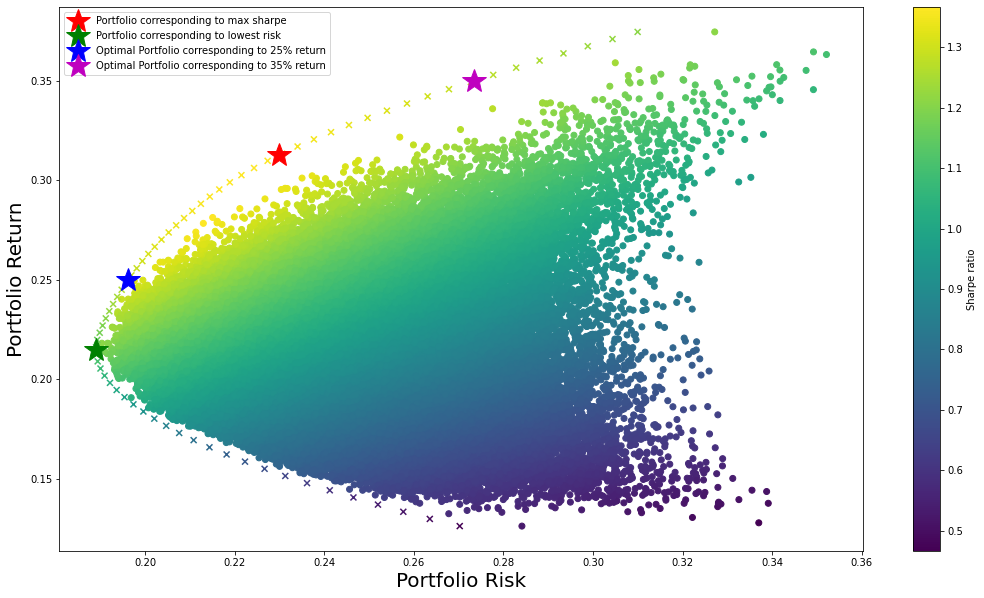

In [68]:
plt.figure(figsize=(18,10))

plt.scatter(portfolio_risks, portfolio_returns,
            c = ( portfolio_returns / portfolio_risks),
            marker = 'o')



# Plotting the efficient frontier
plt.scatter(minimal_risks,
            target_returns,
            c = (target_returns / minimal_risks),
            marker = 'x')


#Plotting the portfolio that has highest Sharpe Ratio
Optimal_weights_For_Highest_Sharpe_Ratio = OptimizationWithSharpeRatio().x

plt.plot(portfolio_stats(Optimal_weights_For_Highest_Sharpe_Ratio)['risk'],
         portfolio_stats(Optimal_weights_For_Highest_Sharpe_Ratio)['return'],
         'r*',
         markersize = 25.0, label = "Portfolio corresponding to max sharpe")



#Plotting the optimal portfolio that has lowest risk
Optimal_weights_For_Lowest_Risk = OptimizingWithMinRisk().x

plt.plot(portfolio_stats(Optimal_weights_For_Lowest_Risk)['risk'],
         portfolio_stats(Optimal_weights_For_Lowest_Risk)['return'],
         'g*',
         markersize = 25.0, label = "Portfolio corresponding to lowest risk")

#Plotting the optimal portfolio for 25% annual returns
Optimal_weights_for_twenty_five_percent_returns = OptimizationForAGivenReturn(0.25).x

plt.plot(portfolio_stats(Optimal_weights_for_twenty_five_percent_returns)['risk'],
         portfolio_stats(Optimal_weights_for_twenty_five_percent_returns)['return'],
         'b*',
         markersize = 25.0, label = "Optimal Portfolio corresponding to 25% return")


#Plotting the optimal portfolio for 35% annual returns
Optimal_weights_for_thirty_five_percent_returns = OptimizationForAGivenReturn(0.35).x

plt.plot(portfolio_stats(Optimal_weights_for_thirty_five_percent_returns)['risk'],
         portfolio_stats(Optimal_weights_for_thirty_five_percent_returns)['return'],
         'm*',
         markersize = 25.0, label = "Optimal Portfolio corresponding to 35% return")

plt.xlabel('Portfolio Risk',fontsize = 20)
plt.ylabel('Portfolio Return', fontsize = 20)
plt.legend(prop={'size': 10})
plt.colorbar(label='Sharpe ratio')

- The efficient frontier is different for different investors, depending upon the assets they are holding



- There is nothing like a single optimal portfolio. The efficient frontier is the collection of optimal portfolios.

- The investors can choose any optimal portfolio depending upon the risk they can take